# House Prices: Advanced Regression Techniques

## Import packages

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import DataConversionWarning
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load dataset

In [3]:
#read data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [4]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Find correlation


<AxesSubplot:>

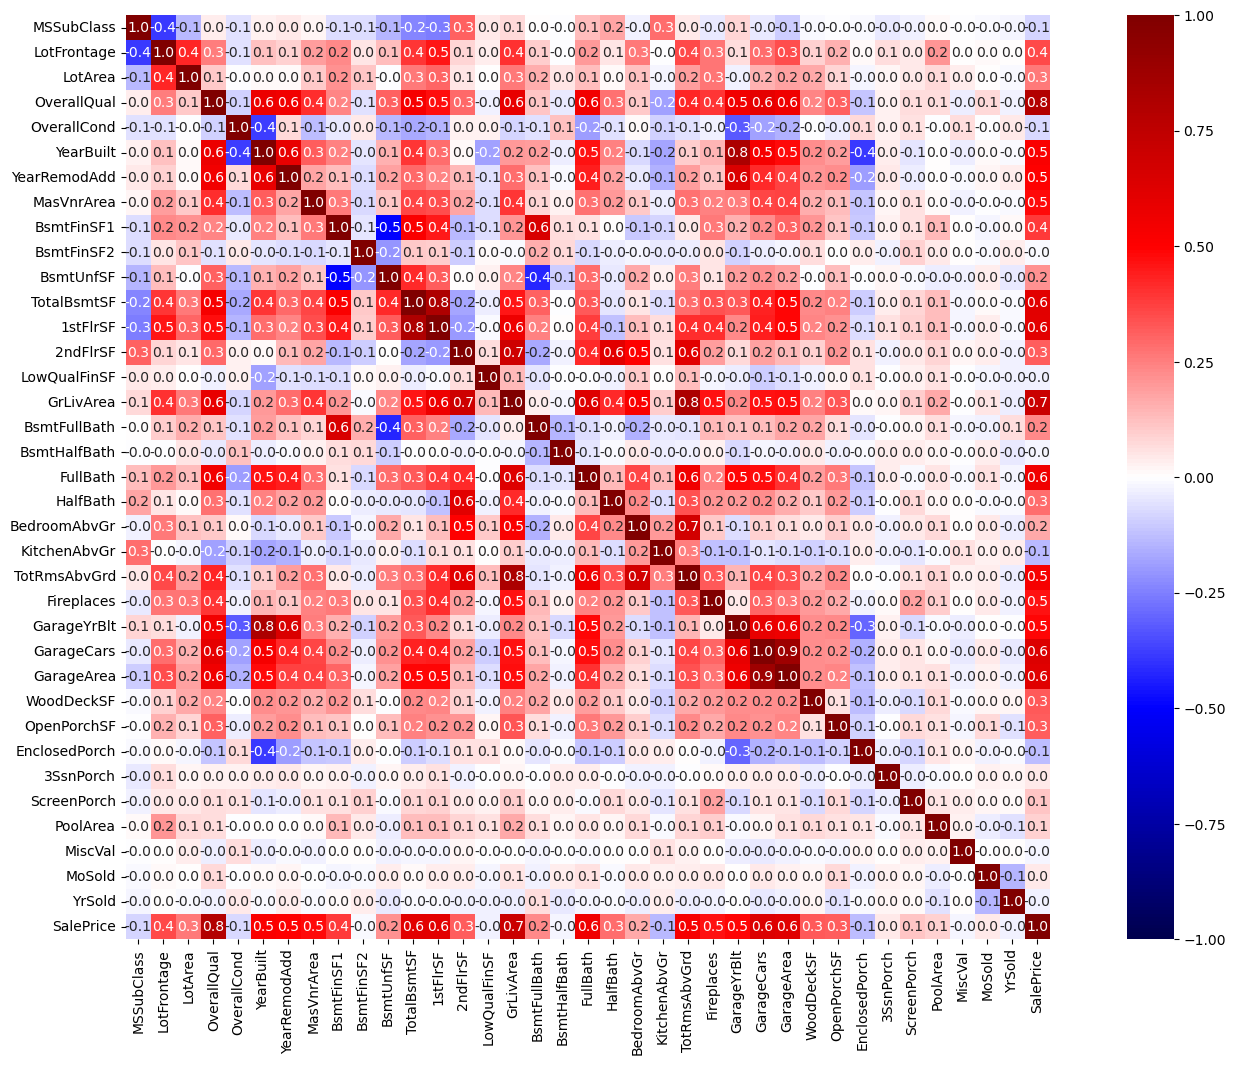

In [5]:
plt.subplots(figsize=(20,12))
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.1f',square = True)

#We can find OverallQual, BsmtFinSF,1stFlrSF... have positive correlation with SalesPrice

## Transform skewed data with log transformation

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


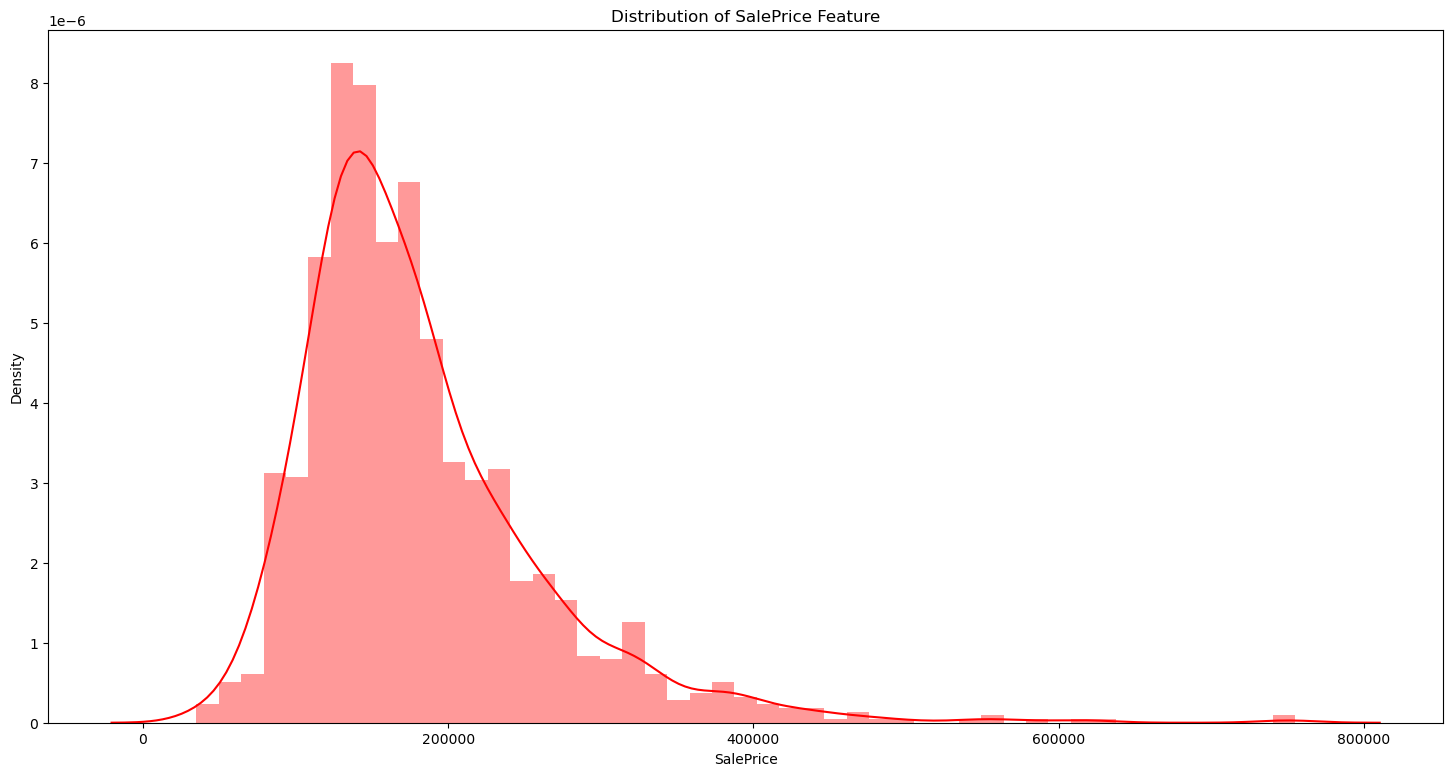

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we load stuff.


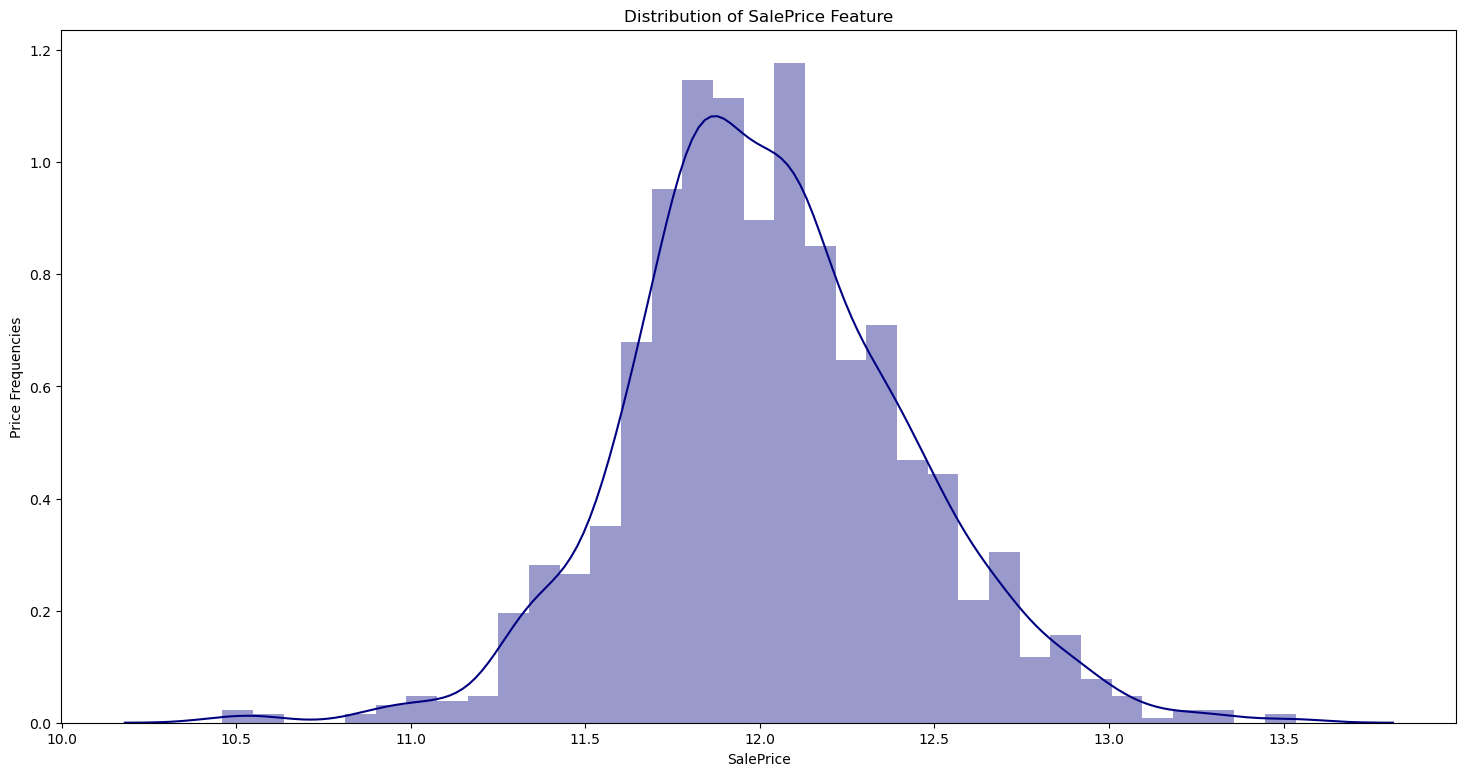

In [6]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['SalePrice'], color="red")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

train['SalePrice'] = np.log(train['SalePrice'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(train['SalePrice'], color="navy")
ax.set(ylabel="Price Frequencies")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

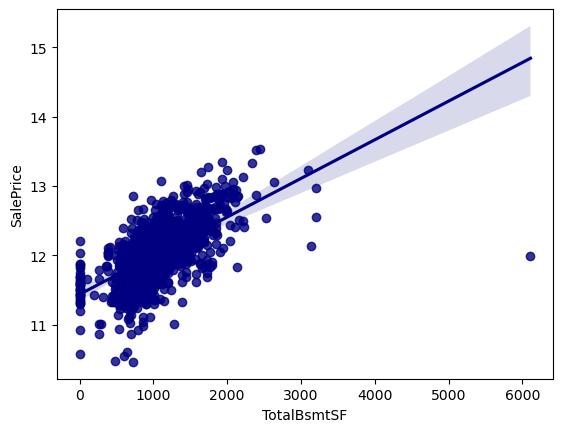

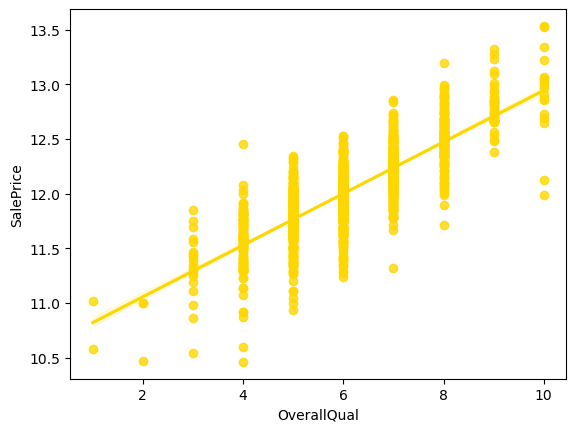

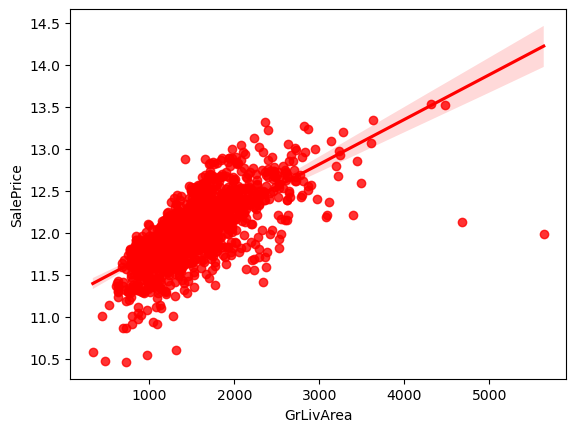

In [7]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', color = 'navy', data = train)
plt.show()
sns.regplot(x = 'OverallQual', y = 'SalePrice', color = 'gold', data = train)
plt.show()
sns.regplot(x = 'GrLivArea', y = 'SalePrice', color = 'red', data = train)
plt.show()

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
df_new = pd.concat((train, test)).reset_index(drop=True)
df_new.drop(['SalePrice'], axis=1, inplace=True)

Text(0.5, 1.0, 'Features with the highest percentage of Nan values')

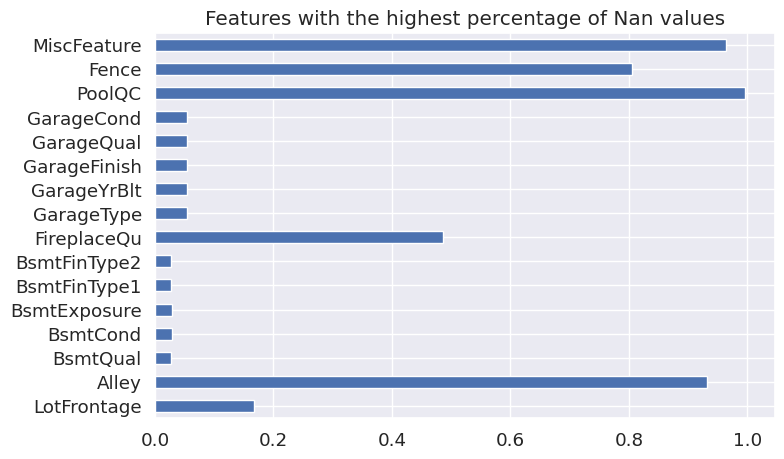

In [9]:
#handing missing value
col_nan = df_new.isna().sum() / df_new.shape[0]
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
col_nan[col_nan > 0.01].plot(kind = "barh")
plt.title("Features with the highest percentage of Nan values")

In [10]:
df_new["PoolQC"] = df_new["PoolQC"].fillna("Not Available")
df_new["MiscFeature"] = df_new["MiscFeature"].fillna("Not Available")
df_new["Alley"] = df_new["Alley"].fillna("Not Available")
df_new["FireplaceQu"] = df_new["FireplaceQu"].fillna("Not Available")
df_new["LotFrontage"] = df_new.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df_new["MasVnrType"] = df_new["MasVnrType"].fillna("Not Available")
df_new["Fence"] = df_new["Fence"].fillna("Not Available")
df_new['SaleType'] = df_new['SaleType'].fillna(df_new['SaleType'].mode()[0])
df_new['MSSubClass'] = df_new['MSSubClass'].fillna("Not Available")
df_new = df_new.drop(['Utilities'], axis=1)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_new[col] = df_new[col].fillna('Not Available')
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_new[col] = df_new[col].fillna('Not Available')

In [15]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_new[col] = df_new[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_new[col] = df_new[col].fillna(0)
df_new["MasVnrArea"] = df_new["MasVnrArea"].fillna(0)
df_new['MSZoning'] = df_new['MSZoning'].fillna(df_new['MSZoning'].mode()[0])
df_new["Functional"] = df_new["Functional"].fillna("Typ")
df_new['Electrical'] = df_new['Electrical'].fillna(df_new['Electrical'].mode()[0])
df_new['KitchenQual'] = df_new['KitchenQual'].fillna(df_new['KitchenQual'].mode()[0])
df_new['Exterior1st'] = df_new['Exterior1st'].fillna(df_new['Exterior1st'].mode()[0])
df_new['Exterior2nd'] = df_new['Exterior2nd'].fillna(df_new['Exterior2nd'].mode()[0])


In [16]:
#Feature engineering
df_new['MSSubClass'] = df_new['MSSubClass'].apply(str)
df_new['OverallCond'] = df_new['OverallCond'].astype(str)
df_new['YrSold'] = df_new['YrSold'].astype(str)
df_new['MoSold'] = df_new['MoSold'].astype(str)

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

le = LabelEncoder()

for i in cols:
    df_new[i] = le.fit_transform(df_new[[i]])
    
numeric_feats = df_new.dtypes[df_new.dtypes != "object"].index

skewed_feats = df_new[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    df_new[i] = boxcox1p(df_new[i], lam)
    
df_new = pd.get_dummies(df_new)
print(df_new.shape)
train = df_new[:ntrain]
test = df_new[ntrain:]
print(train.shape)
print(test.shape)


Skew in numerical features: 

There are 58 skewed numerical features to Box Cox transform
(2919, 221)
(1460, 221)
(1459, 221)


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Regression model

gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42) 

xgbr = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

ctbr = CatBoostRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       subsample=0.7,
                       silent = True,
                       random_state=42)

lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=6000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
rfr = RandomForestRegressor(n_estimators=6000,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [25]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1).get_n_splits(train.values)

In [20]:
gbr_mse_cv_scores = - cross_val_score(gbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
gbr_rmse_score = np.sqrt(gbr_mse_cv_scores)

xgbr_mse_cv_scores = - cross_val_score(xgbr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
xgbr_rmse_score = np.sqrt(xgbr_mse_cv_scores)

lgbm_mse_cv_scores = - cross_val_score(lgbm, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
lgbm_rmse_score = np.sqrt(lgbm_mse_cv_scores)

rfr_mse_cv_scores = - cross_val_score(rfr, train.values,y_train,cv = kf, scoring = 'neg_mean_squared_error',n_jobs = -1)
rfr_rmse_score = np.sqrt(rfr_mse_cv_scores)

print('Gradient Boosting Regressor CV RMSE Score :', gbr_rmse_score.mean())
print('XGBoost Regressor CV RMSE Score :', xgbr_rmse_score.mean())
print('LightGBM Regressor CV RMSE Score :', lgbm_rmse_score.mean())
print('Random Forest Regressor CV RMSE Score :', rfr_rmse_score.mean())

Gradient Boosting Regressor CV RMSE Score : 0.12181799920606226
XGBoost Regressor CV RMSE Score : 0.14292122411769906
LightGBM Regressor CV RMSE Score : 0.12332500399999316
Random Forest Regressor CV RMSE Score : 0.14685452134178414
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in

In [29]:
gbr.fit(train, y_train)
gbr_train_pred = gbr.predict(train)
gbr_pred = np.expm1(gbr.predict(test.values))
rmse_gbr = np.sqrt(mean_squared_error(y_train,gbr_train_pred))
print(rmse_gbr)


0.07124588658672852


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
ctbr.fit(train,y_train)
ctbr_train_pred = ctbr.predict(train)
ctbr_pred = np.expm1(ctbr.predict(test.values))
rmse_ctbr = np.sqrt(mean_squared_error(y_train,ctbr_train_pred))
print(rmse_ctbr)

0.04895157784330919


In [32]:
xgbr.fit(train,y_train)
xgbr_train_pred = xgbr.predict(train)
xgbr_pred = np.expm1(xgbr.predict(test.values))
rmse_xgbr = np.sqrt(mean_squared_error(y_train,xgbr_train_pred))
print(rmse_xgbr)

0.12024121534824234


In [33]:
lgbm.fit(train, y_train)
lgbm_train_pred = lgbm.predict(train)
lgbm_pred = np.expm1(lgbm.predict(test.values))
rmse_lgbm = np.sqrt(mean_squared_error(y_train,lgbm_train_pred))
print(rmse_lgbm)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
0.058013567983636855


In [34]:
rfr.fit(train, y_train)
rfr_train_pred = rfr.predict(train)
rfr_pred = np.expm1(rfr.predict(test.values))
rmse_rfr = np.sqrt(mean_squared_error(y_train,rfr_train_pred))
print(rmse_rfr)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.09211922664433185


In [35]:
models = ['Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM', 'Random Forest']

rmse_scores = [rmse_gbr, rmse_xgbr, rmse_ctbr, rmse_lgbm, rmse_rfr]

model_scores = pd.DataFrame({
    
    'Regression Models' : models,
    'RMSE Scores' : rmse_scores
    
})

results = model_scores.sort_values('RMSE Scores', ascending = True, ignore_index= True)
results

,Regression Models,RMSE Scores
0,CatBoost,0.049
1,LightGBM,0.058
2,Gradient Boosting,0.071
3,Random Forest,0.092
4,XGBoost,0.120


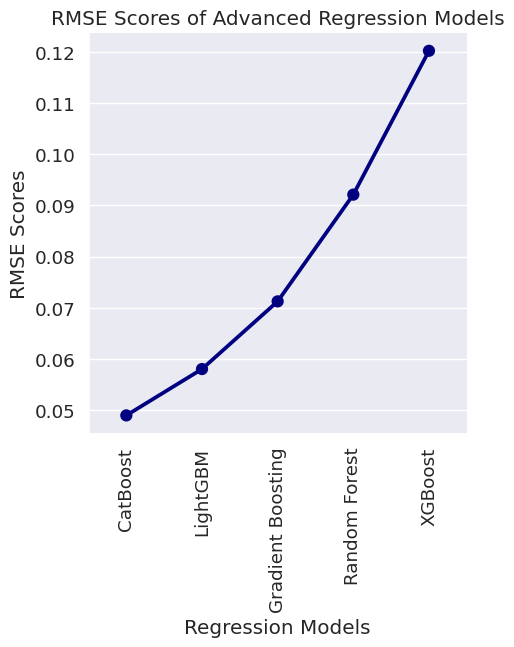

In [37]:
sns.catplot(x = 'Regression Models', y = 'RMSE Scores', order = ['CatBoost', 'LightGBM', 'Gradient Boosting', 'Random Forest', 'XGBoost'],
           data = results, kind='point', color = 'Navy')
plt.title('RMSE Scores of Advanced Regression Models')
plt.xticks(rotation = 90)
plt.show()

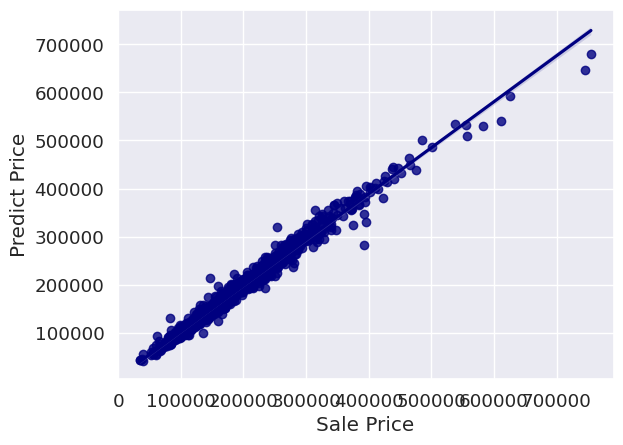

In [57]:
result = pd.DataFrame({
    'Predict Price' : np.exp(lgbm_train_pred),
    'Sale Price' : train['SalePrice']
})

sns.regplot(x = 'Sale Price', y = 'Predict Price', color = 'navy', data = result)
plt.show()

result
result.to_csv('final_submission.csv', index = 'None')